# Dow Jones - Historic Stock Data (2000-2020) Analysis

In this Notebook we will have a quick look at the historic Dow Jones data-set, perform feature engineering and use plots to understand the results.



## Load Data

First, let's load the data and have a look at it.

In [1]:
# Import libs...
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# ... and set variables
FILE_LOCATION = './data/preprocessed/dow_historic_2000_2020.csv'

In [2]:
# Read dataframe and show last couple of rows...
df = pd.read_csv(FILE_LOCATION)
df.tail()

,stock,date,open,high,low,close,adj_close,volume,dividend,split
150498,WMT,2020-12-24,143.54,144.39,143.18,143.50,142.34,3018157,0.0,1.0
150499,WMT,2020-12-28,144.04,145.30,143.33,145.22,144.05,6383951,0.0,1.0
150500,WMT,2020-12-29,145.64,145.84,143.59,144.30,143.13,5979380,0.0,1.0
150501,WMT,2020-12-30,144.88,145.15,143.94,144.18,143.01,6250385,0.0,1.0
150502,WMT,2020-12-31,144.20,144.27,142.85,144.15,142.99,5938018,0.0,1.0


...as you can see, we have multiple interesting data columns (you can check the data set description for a detailled explanation of the columns): <https://www.kaggle.com/deeplytics/dow-stock-data>

## Pre-Processing

Now, let's enginere some date-related features and also add a column which shows the daily change percentage of the stock.

In [3]:
# Engineer some basic features...
# Convert date to datetime format
df.date = pd.to_datetime(df.date)
# Add year
df['year'] = df.date.dt.year
# Add month
df['month'] = df.date.dt.month_name().str[0:3]
# Add weekday
df['day_of_week'] = df.date.dt.day_name()
# Calculate the stock movement on a given day
df['pct_change_day'] = round((df.close / df.open - 1) * 100, 3)


Now, let's check our data with pandas describe operation...

In [4]:
df.describe()

,open,high,low,close,adj_close,volume,dividend,split,year,pct_change_day
count,150503.000000,150503.000000,150503.000000,150503.000000,150503.000000,1.505030e+05,150503.000000,150503.000000,150503.000000,150503.000000
mean,81.186938,82.014406,80.338642,81.195315,57.893233,1.238773e+07,0.006498,1.000229,2010.183757,0.024084
std,61.581372,62.138226,60.984929,61.575008,51.198740,1.761208e+07,0.072469,0.023659,6.033778,1.625537
min,8.450000,9.210000,8.120000,8.600000,0.200000,1.089380e+05,0.000000,1.000000,2000.000000,-27.329000
25%,42.425000,42.920000,41.920000,42.420000,23.250000,3.616200e+06,0.000000,1.000000,2005.000000,-0.720000
50%,62.790000,63.460000,62.140000,62.830000,40.810000,6.525400e+06,0.000000,1.000000,2010.000000,0.018000
75%,100.500000,101.455000,99.510000,100.505000,74.880000,1.244036e+07,0.000000,1.000000,2015.000000,0.759000
max,702.410000,705.070000,699.570000,702.100000,430.350000,6.166205e+08,7.160000,7.000000,2020.000000,29.457000


## Plotting

We can also do some plotting to learn more about the data. 

First let us check the average stock movements per day.

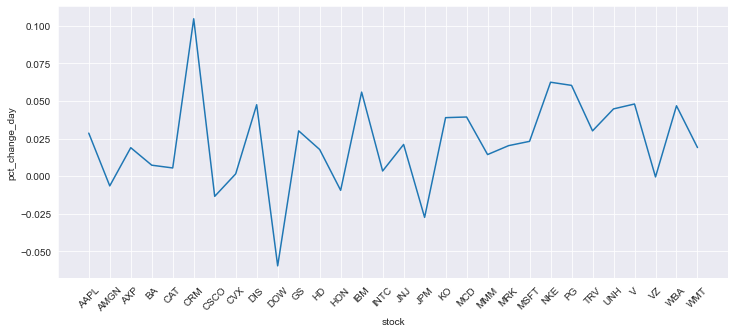

In [9]:
# Use a group-by operation to calculate the pct_change mean 
stock_performance = df.groupby('stock').pct_change_day.mean() 

# Chose seaborn style
sns.set_style("darkgrid")
# Use matplotlib and seaborn to plot a lineplot....
plt.figure(figsize=(12,5))
chart = sns.lineplot(x=stock_performance.index, y=stock_performance)
_ = plt.xticks(rotation=45)


We can observe that the *CRM* stock (*Salesforce*) has the highest *mean* intra-day stock performance in this data-set (tnote that his company is rather young and historic performances should not be extrapolated into the future).

Next, let us combine the *pct_change_day* feature with two of the other features we derived from the data-column (month and day-of-week).

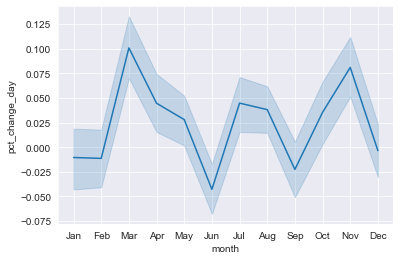

In [7]:
# Make lineplot for months...
_ = sns.lineplot(data=df, x="month", y="pct_change_day")

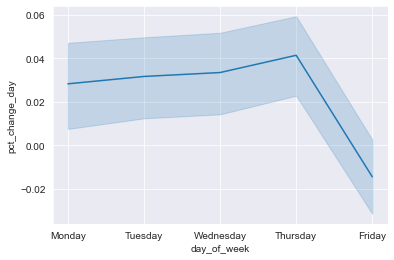

In [8]:
# Make lineplot for day of week...
_ = sns.lineplot(data=df, x="day_of_week", y="pct_change_day")

From the plots above we can see that - *historically* - in June and September stocks dropped most, while in March and November stocks performed best. It is also interesting to see, that in *average* stocks increased every day of the week, except friday.


## What did we learn ?
- Understand which kind of information is included in this data set
- How to easilly engineer some additional features
- Use a plot to get an understanding of the different stock performances
- Plot some of the newly created features to understand their value (month, day of week)

This was only a small example what can be done with the available data set - other features like *dividends*, *trading volume* and *stock splits* could be investigated as well...if you like, **have fun** and success with your own stock data analysis!

In [11]:
len(df)

150503